In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
advertising = pd.read_csv(r"C:\Users\Ankur Srivastava\Documents\IMT\MLAP\MLAP MT 10 Aug 2020 - Part - B\advertising.csv")


In [4]:
advertising.head()

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6


In [5]:
advertising.shape

(200, 6)

In [6]:
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [7]:
advertising.describe()


,Sno,TV,Radio,Newspaper,Sales
count,200.000000,199.000000,199.000000,199.000000,200.000000
mean,100.500000,146.588442,23.241709,30.134673,14.022500
std,57.879185,85.829686,14.880898,21.008552,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.050000,9.950000,12.700000,10.375000
50%,100.500000,149.700000,22.500000,25.600000,12.900000
75%,150.250000,218.450000,36.550000,44.700000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [8]:
advertising.isnull().sum()

Sno          0
TV           1
Radio        1
Newspaper    1
Day          3
Sales        0
dtype: int64

In [9]:
advertising.dropna()

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,Weekdays,8.4
196,197,94.2,4.9,8.1,Weekdays,10.8
197,198,177.0,9.3,6.4,Weekdays,15.2
198,199,283.6,42.0,66.2,Holiday,4.8


In [10]:
advertising['Day'].unique()

array(['Weekend', 'Weekdays', nan, 'Holiday'], dtype=object)

In [11]:
pd.get_dummies(advertising['Day'])[0:5]

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [12]:
categorical_features = ['Day']

In [13]:
advertising = pd.get_dummies( advertising[advertising.columns],
columns = categorical_features,
drop_first = True )

In [14]:
advertising.columns

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Sales', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

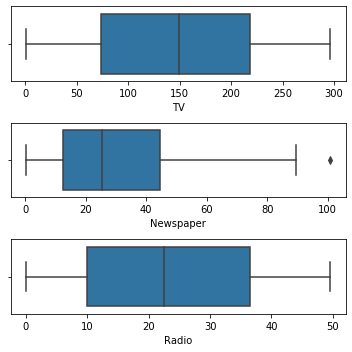

In [15]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

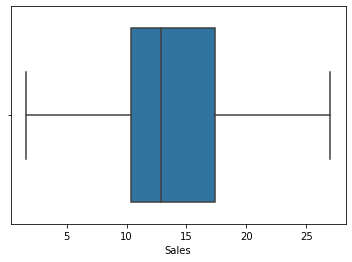

In [16]:
sns.boxplot(advertising['Sales'])
plt.show()

In [17]:
X = advertising['TV']
y = advertising['Sales']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 59)

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [24]:
Ststsmodels_model = smf.ols(formula='Sales ~ TV', data = advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    13.579484
TV            0.003064
dtype: float64

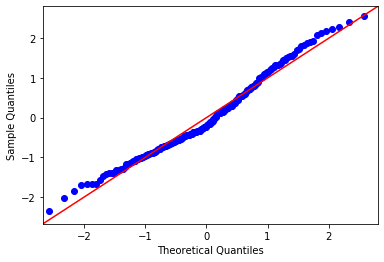

In [25]:
Ststsmodels_residual = Ststsmodels_result.resid
ax = sm.qqplot(Ststsmodels_residual, fit = True, line = "45")

In [26]:
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4994
Date:                Wed, 12 Aug 2020   Prob (F-statistic):              0.481
Time:                        17:16:41   Log-Likelihood:                -610.84
No. Observations:                 199   AIC:                             1226.
Df Residuals:                     197   BIC:                             1232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5795      0.736     18.449      0.000      12.128      15.031
TV             0.0031      0.004      0.707      0.481      -0.005       0.012
==============================================================================
Omnibus:                        7.136   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.856
Skew:                           0.405   Prob(JB):                       0.0324
Kurtosis:                       2.585   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""